# Aykırı Gözlem Analizi

## Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

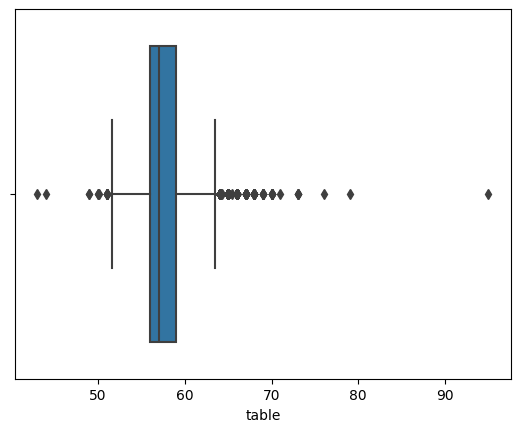

In [4]:
sns.boxplot(x = df_table);

In [54]:
#çeyrekliklerden eşik değer belirleme
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [55]:
Q1

table    56.0
Name: 0.25, dtype: float64

In [5]:
Q3

59.0

In [6]:
IQR

3.0

In [7]:
#eşik değeri belirleme
alt_sinir = Q1- 1.5*IQR # 1. değerin 1.5*IQR kadar önceki değeri eşik değeri
ust_sinir = Q3 + 1.5*IQR

In [10]:
alt_sinir

51.5

In [11]:
ust_sinir

63.5

In [12]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [8]:
aykiri_tf = ((df_table < alt_sinir) | (df_table > ust_sinir))

In [14]:
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [15]:
#aykırı değerlere erişmek
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [16]:
#kaç adet aykırı değer var
df_table[aykiri_tf].value_counts().count()

21

In [17]:
#aykırı değerlerin indekslerine erişmek
df_table[aykiri_tf].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

## Aykırı Değer Problemini Çözmek

In [18]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

### Silme

In [56]:
import pandas as pd

In [57]:
type(df_table)

pandas.core.frame.DataFrame

In [58]:
df_table = pd.DataFrame(df_table)

In [59]:
df_table.shape

(53940, 1)

In [15]:
#sütun bazında aykırı değer hariç değerleri seçme
t_df = df_table[~((df_table< (alt_sinir)) | (df_table>(ust_sinir))).any(axis=1)]

In [16]:
#~(tilda) işaretinin anlamı belirtilen koşulun dışındakileri seç demektir. Yani aykırı gözlem harici değerleri seçiyoruz

In [17]:
t_df.shape

(53335, 1)

In [18]:
#aynı işlemi drop ile yapmak
a = df_table.drop(df_table[aykiri_tf].index)
a.shape

(53335, 1)

### Ortalama ile Doldurma

In [30]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [31]:
df_table = df["table"]

In [32]:
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [33]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [34]:
df_table.mean()

57.45718390804598

In [35]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\Furkan\AppData\Local\Temp\ipykernel_14436\3741757661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [36]:
df_table[aykiri_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

### Baskılama Yöntemi

In [51]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [52]:
df_table = df["table"]

In [53]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [54]:
alt_sinir

51.5

In [59]:

df_table[df_table<=alt_sinir] = alt_sinir
    

C:\Users\Furkan\AppData\Local\Temp\ipykernel_14436\917018841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_table<=alt_sinir] = alt_sinir


In [60]:
df_table[df_table>=ust_sinir] = ust_sinir

C:\Users\Furkan\AppData\Local\Temp\ipykernel_14436\447610091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_table>=ust_sinir] = ust_sinir


In [64]:
df_table[aykiri_tf].head(50)

2       63.5
91      63.5
145     63.5
219     63.5
227     63.5
239     63.5
296     63.5
314     63.5
356     63.5
359     63.5
461     63.5
504     63.5
526     63.5
712     63.5
771     63.5
777     63.5
868     63.5
919     63.5
929     63.5
932     63.5
1140    63.5
1196    63.5
1227    63.5
1275    63.5
1319    63.5
1422    63.5
1493    63.5
1498    63.5
1515    51.5
1524    63.5
1552    63.5
1598    63.5
1641    63.5
1880    63.5
1903    63.5
2071    63.5
2131    63.5
2143    63.5
2209    63.5
2232    63.5
2262    63.5
2272    63.5
2298    63.5
2443    63.5
2474    63.5
2504    63.5
2794    63.5
2857    63.5
2915    63.5
2926    63.5
Name: table, dtype: float64

# Eksik Veri Analizi

## Hızlı Çözüm

In [60]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [72]:
#hangi sütunda kaç eksik var
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [73]:
#eksik olmayan kaç değer var
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [74]:
#toplam kaç eksik değer var
df.isnull().sum().sum()

7

In [75]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [76]:
#eksik bir değer barındıran sütunları listeleme
df[df.isnull().any(axis = 1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [77]:
#eksik değer barındırmayan sütunları inceleme
df[df.notnull().all(axis = 1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
#eksik degerlerin direkt silinmesi

In [79]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [80]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [81]:
#basit deger atama

In [82]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [83]:
df["V1"].mean()

6.0

In [84]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [85]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [86]:
#bütun sütunlara tek seferde ortalama değer ataması
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Kategorik Değişken Kırılımında Değer Atama

In [61]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [99]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [106]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## Kategorik Değişkenler için Eksik Değer Atama

In [28]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [29]:
df["departman"].mode()

0    IK
Name: departman, dtype: object

In [30]:
df["departman"].mode()[0]

'IK'

In [31]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [32]:
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [33]:
#bir sonraki değeri ile doldurma
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [34]:
#bir önceki değer ile doldurma
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [62]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Standardizasyon

In [36]:
#ortalama değerin 0, standart sapmanın ise 1 değerini aldığı, dağılımın normale yaklaştığı bir metoddur

In [37]:
from sklearn import preprocessing 

In [38]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [8]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


## Normalizasyon

In [ ]:
#değişkenlerin 0 ve 1 arasındaki değerlere atanmasıdır.

In [9]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

## Min-Max Dönüşümü

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [14]:
scaler.fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

## Değişken Dönüşümleri

In [63]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Dönüşümü

In [42]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [43]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [44]:
df["cinsiyet"] = lbe.fit_transform(df["sex"])

In [45]:
df

,total_bill,tip,sex,smoker,day,time,size,cinsiyet
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


### Çok Sınıflı Dönüşüm

In [46]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [47]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [48]:
df["gün"] = lbe.fit_transform(df["day"])

In [49]:
df

,total_bill,tip,sex,smoker,day,time,size,cinsiyet,gün
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1


### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [50]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,cinsiyet,gün
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2


In [51]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["kat"])

In [52]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,cinsiyet,gün,kat_Male,kat_Female
0,16.99,1.01,No,Sun,Dinner,2,0,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,2,0,1


In [53]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,cinsiyet,gün,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,2,0,0,0,1
